In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

В качестве темы для нашего проекта мы выбрали анализ проектов по краудфандингу в Великобритании. Для сбора информации была использована платформа "Crowdfunder UK" https://www.crowdfunder.co.uk/

Основной целью краудфандинга является сбор средств для реализации разнообразных проектов от сообщества. В качестве инвесторов могут выступать любые люди, также они могут инвестировать различные суммы денег. 

Код для осуществления парсинга представлен в отдельной тетрадке: 'Парсинг данных о краудфандинге' (см. репо).

In [2]:
df_pars = pd.read_pickle('df_main.pkl')
df_pars.head()

,href,title,description,location,tags,upd,comm,supp,rewards_num,money,rate,days,status
0,https://www.crowdfunder.co.uk/free-assange,Help campaign to Free Julian Assange,Help campaign to Free Julian Assange and Stop ...,"London, Greater London, United Kingdom","[Community, Personal Causes]",22,1242,3576,0,300000,0.61,null,funding
1,https://www.crowdfunder.co.uk/blackout2023,Black Out 2023 | Cannes Lions Festival,Taking Black talent connected to the creative ...,"London, Greater London, United Kingdom","[Business, Music]",0,9,24,0,100000,0.84,null,funding
2,https://www.crowdfunder.co.uk/50-days-to-make-...,50 Days to Make a Difference,Our scientists curate a portfolio of effective...,"London, Greater London, United Kingdom",[Environment],0,11,68,3,150000,0.55,null,funding
3,https://www.crowdfunder.co.uk/saveside,#SAVESIDE,"As of 9th April 2023, Side Gallery will close ...","Newcastle upon Tyne, Tyne and Wear, United Kin...",[Creative & Arts],5,694,1806,0,75000,1.04,null,funding
4,https://www.crowdfunder.co.uk/lets-smash-the-p...,Let's smash the political silence on Brexit,"Everyone knows Brexit isn't working, but polit...","London, Greater London, United Kingdom",[Politics],1,407,2391,6,100000,0.6,null,funding


Для нашей работы мы отобрали несколько показателей, характеризующих краудфандинг. Среди них можно выделить качественные – название, описание, локация, тэги и статус, а также количественные – обновления, комментарии, инвесторы, награды, сумма денег, rate уровень финансирования и количество дней. Рассмотрим каждый из этих характеристик подробнее. 

**`title`**: название проекта

**`description`**: описание представляет собой краткое описание проблемы, которая нуждается в материальной поддержке или цели проектов, которые необходимо реализовать.

**`location`**:
локация показывает место, в котором располагаются организаторы проекта

**`tags`**:
тэги определяют темы и сферы жизни, в которым относится проект (их может быть несколько у одного проекта)

**`status`**:
статус показывает текущее состояние проекта – статус success означает, что проект успешно завершен и нужная сумма собрана, funding означает, что проект все еще находится на стадии финансирования

**`upd`**:
количество обновлений демонстрирует обратную связь от организаторов проектов к инвесторам. Обычно в них пишут про достижение промежуточных или итоговых целей, новости, связанные с проектом или близкие к нему, а также благодарности от организаторов ко всем инвесторам 

**`comm`**:
комментарии, наоборот, показывают отклик инвесторов на проект 

**`supp`**:
количество инвесторов показывает количество человек, которые профинансировали проект

**`rewards_num`**:
награды представляют собой какие-либо поощрения за инвестирование и, чаще всего, зависят от суммы донации. Например, в некоторых проектах за вложения в 10-50 фунтов можно получить специальные сертификаты или скидки на продукцию. Количество наград показывает, какое их количество предлагают организаторы своим инвесторам. 

**`money`**:
сумма денег для успешных проектов показывает количество собранных денег, а для текущих – цель по сборам. 
**`rate`**:
также для текущих присутствует показатель rate, который определяет, какая часть от цели собрана на данный момент.

**`days`**:
количество дней для завершенных проектов показывает за какое время была собрана указанная сумма.

In [150]:
df_pars.shape

(1952, 13)

Всего мы собрали 1952 наблюдения

In [151]:
df_pars.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   href         1952 non-null   object
 1   title        1951 non-null   object
 2   description  1951 non-null   object
 3   location     1952 non-null   object
 4   tags         1952 non-null   object
 5   upd          1952 non-null   object
 6   comm         1952 non-null   object
 7   supp         1952 non-null   object
 8   rewards_num  1952 non-null   int64 
 9   money        1952 non-null   object
 10  rate         1952 non-null   object
 11  days         1952 non-null   object
 12  status       1951 non-null   object
dtypes: int64(1), object(12)
memory usage: 198.4+ KB


Видим, что все, кроме одной, колонки имеют тип данных object – это не очень хорошо, ведь мы явно знаем, что некоторые колонки должны иметь тип int. Скорее всего такое произошло из-за пропусков. Нужно будет найти их и после этого подкорректировать форматы колонок.

Для удобства мы обработали колонки "название", "описание" и "локация" и добавили новые признаки. Все изменения представлены в модуле 'описания, тэги, локации + новые признаки'.

**`description`** теперь содержит список значимых для анализа слов.

**`tags`** мы разбили на отдельные колонки, соответствующие каждой представленной категории (потои дропнем **`tags`**, **`tags_null`** - для сокращения размерности).

**`sentiment_score`** показывает совокупную эмоциональую окраску описания.

**`ps_capital`** показывает уровень психологических ресурсов индивида или организации, состоящий из надежды, оптимизма, стойкости и уверенности в себе. Исследования краудфандинга дают основания предполагать, что психологический капитал повышает вероятность успешности проекта + величину собранной суммы.

**`inn_score`** показывает уровень использования слов, которые ассоциируются с инновационностью, в описании проекта.

**`eco_score`** показывает уровень использования слов, которые ассоциируются с экологичностью, в описании проекта.

Далее будет использоваться обновленная таблица с данными

В качестве локации было решено оставить только город, так как это позволяет провести наиболее информативный анализ.

In [3]:
ind = df_pars[df_pars['location'] == 'null'].index
ind.shape

(169,)

In [4]:
ind_ = df_pars[df_pars['location'] == ''].index
ind_.shape

(29,)

Как можно заметить, в графе локации присутствовало 198 пропуска данных. При группировке это играло значительную роль, так как практически ни в одном городе не было такого количества как успешных, так и текущих проектов. Для заполнения пропусков мы проанализировали данные по названиям и описаниям проектов - нашли слова, с помощью которых можно определить локацию проекта, заполнив практически все пропуски данными. Оставшиеся мы приравняли к национальным проектам и внесли им локацию UK

Кроме того, в исходных данных было значительное количество пропусков в столбце "money", поэтому мы провели дополнительный парсинг данных, чтобы их заполнить. Новые данные были сохранены в файле "df_main.pkl", поэтому в 8 строке мы перезаписываем их в рабочий датафрейм. 

In [83]:
df = pd.read_pickle('df_locs_tags_nlp.pkl')
# В ходе обработки столбец "location" сместился на последнее место, вернем его на прежнее место для удобства
before = list(df.columns[:3])
after = list(df.columns[3:-1])
location = [df.columns[-1]]
order = before + location + after 
df = df.reindex(columns=order)
df['money'] = df_pars['money']
df.shape

(1952, 46)

In [6]:
df.loc[[1195, 1210], 'location'] = 'London'
df.loc[1677, 'location'] = 'Cornwall'
df.loc[1779, 'location'] = 'Brighton'

In [7]:
ind2 = df[df['location'] == ''].index
df.loc[ind2, 'location'] = 'United Kingdom' # Оставшиеся пропуски заменим на UK - то есть национальный проект
df['location'] = [i.split(', ')[0] for i in list(df['location'])] # в каждой локации на первой позиции стоит город, либо UK, поэтому можно осуществить такую замену
df.head()

,href,title,description,location,tags,upd,comm,supp,rewards_num,money,...,tags_Tourism,tags_Transport,tags_Travel,tags_University,tags_Venue,tags_null,sentiment_score,ps_capital,inn_score,eco_score
0,https://www.crowdfunder.co.uk/free-assange,Help campaign to Free Julian Assange,"[help, campaign, free, julian, assange, stop, ...",London,"[Community, Personal Causes]",22,1242,3576,0,300000,...,0,0,0,0,0,0,0.7840,0,0,0
1,https://www.crowdfunder.co.uk/blackout2023,Black Out 2023 | Cannes Lions Festival,"[taking, black, talent, connected, creative, i...",London,"[Business, Music]",0,9,24,0,100000,...,0,0,0,0,0,0,0.9217,0,2,0
2,https://www.crowdfunder.co.uk/50-days-to-make-...,50 Days to Make a Difference,"[scientists, curate, portfolio, effective, cli...",London,[Environment],0,11,68,3,150000,...,0,0,0,0,0,0,0.7430,1,0,2
3,https://www.crowdfunder.co.uk/saveside,#SAVESIDE,"[april, side, gallery, close, public, due, cri...",Newcastle upon Tyne,[Creative & Arts],5,694,1806,0,75000,...,0,0,0,0,0,0,-0.7096,0,0,0
4,https://www.crowdfunder.co.uk/lets-smash-the-p...,Let's smash the political silence on Brexit,"[everyone, knows, brexit, working, politicians...",London,[Politics],1,407,2391,6,100000,...,0,0,0,0,0,0,0.0000,0,0,0


In [8]:
# Заменим локации UK на расшифровку United Kingdom
ind3 = df[df['location'] == 'UK'].index
df.loc[ind3, 'location'] = 'United Kingdom' 

In [10]:
df.describe()

,upd,comm,supp,rewards_num,tags_Business,tags_Charities,tags_Community,tags_Community shares,tags_Creative & Arts,tags_Entertainment,...,tags_Tourism,tags_Transport,tags_Travel,tags_University,tags_Venue,tags_null,sentiment_score,ps_capital,inn_score,eco_score
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,...,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,2.951844,166.631660,505.026639,7.554816,0.047643,0.137807,0.438012,0.030225,0.090164,0.004098,...,0.001537,0.003586,0.001537,0.002049,0.001537,0.026639,0.366046,0.177254,0.277664,0.161373
std,6.572447,618.336309,1799.531562,11.292580,0.213065,0.344786,0.496270,0.171251,0.286490,0.063903,...,0.039183,0.059792,0.039183,0.045233,0.039183,0.161068,0.426214,0.454303,0.555254,0.457394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.920100,0.000000,0.000000,0.000000
25%,0.000000,7.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,26.500000,102.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.457400,0.000000,0.000000,0.000000
75%,4.000000,115.250000,361.500000,11.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.717950,0.000000,0.000000,0.000000
max,185.000000,15137.000000,46392.000000,107.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.972300,5.000000,3.000000,3.000000


In [39]:
df['upd'].nlargest(10)

1284    185
1490     55
1037     44
980      43
1048     43
1515     43
1818     43
1908     40
1292     38
1568     38
Name: upd, dtype: int64

In [62]:
t = df[df['money'] != 'null']['money']
t.astype(int).nlargest(10)
# надо удалить выбросы 968, 969, 970

971    1108780
276     884900
973     881705
974     703714
975     549600
976     528680
977     500000
978     487815
979     458047
980     456088
Name: money, dtype: int32

In [45]:
df['comm'].nlargest(10)
# удалить 970

970     15137
979      7196
980      6793
1048     6793
1515     6793
1818     6793
972      6614
993      5328
989      4713
990      4036
Name: comm, dtype: int64

In [46]:
df['supp'].nlargest(10)
# удалим 972

972     46392
970     36849
979     15032
1060    14408
990     13950
989     12172
980     11421
1048    11421
1515    11421
1818    11421
Name: supp, dtype: int64

In [84]:
# значительный выброс в строках 968, 969, 970, 972, 1284 - удалим их
df = df.drop([968, 969, 970, 972, 1284])
df.shape

(1947, 46)

In [85]:
mon = df[df['money'] != 'null']['money']
mm = mon.mean()

In [86]:
df['money'].replace('null', mm, inplace = True)

In [89]:
df[df['money'] == 'null']

,href,title,description,location,tags,upd,comm,supp,rewards_num,money,...,tags_Tourism,tags_Transport,tags_Travel,tags_University,tags_Venue,tags_null,sentiment_score,ps_capital,inn_score,eco_score


In [99]:
df.drop(['rate', 'days'], axis = 1, inplace = True)

In [103]:
# превратим числовые переменнные в соответствующий тип
df[['upd', 'comm', 'supp', 'rewards_num', 'money']] = df[['upd', 'comm', 'supp', 'rewards_num', 'money']].apply(pd.to_numeric)

В названиях и описаниях нет пропусков (особенности сайта и парсинга). В локациях нули заменены в дополнительных модулях. В тэгах некотрые нули оставлены, т.к. это значимая информация. В 'upd', 'comm', 'supp', 'rewards_num' нет пропусков. В новых метриках, основанных на описании, тоже нет пропусков. В признаках 'days' и 'rate' есть пропуски в силу особенностей данных. Статус это категориальная переменная, котрую можно будет заменить на 1 и 0. В 'money' нули заменили на среднее по выборке. Мы выявили количество пропусков в колонках rate для текущих проектов и days для завершенных проектов. В них было около 30% пропусков, в гипотезах и моделях мы почти не планировали их использовать и приняли решение исключить данные колонки из дальнейшего анализа. 

Заметим, что переменные силы сообщества (апдейты, комментарии, спонсоры) имеют высокую дисперсию. Эмоциональная окраска описаний в среднем позитивная, однако не все описания демонстрируют позитивный псих. капитал основателей. Так же далеко не все проекты привлекательны с точки зрения инновационности и экологичности.

### Визуализация данных

#### Облака слов названий и описаний

Для визуализации категориальных данных (название проекта и его описание) мы использовали облако слов.

Одними из самых частых слов являются "help", "support" и "community" для обеих колонок, также в названии выделяются слова "save" и "project", а в описании - "new" и "people".

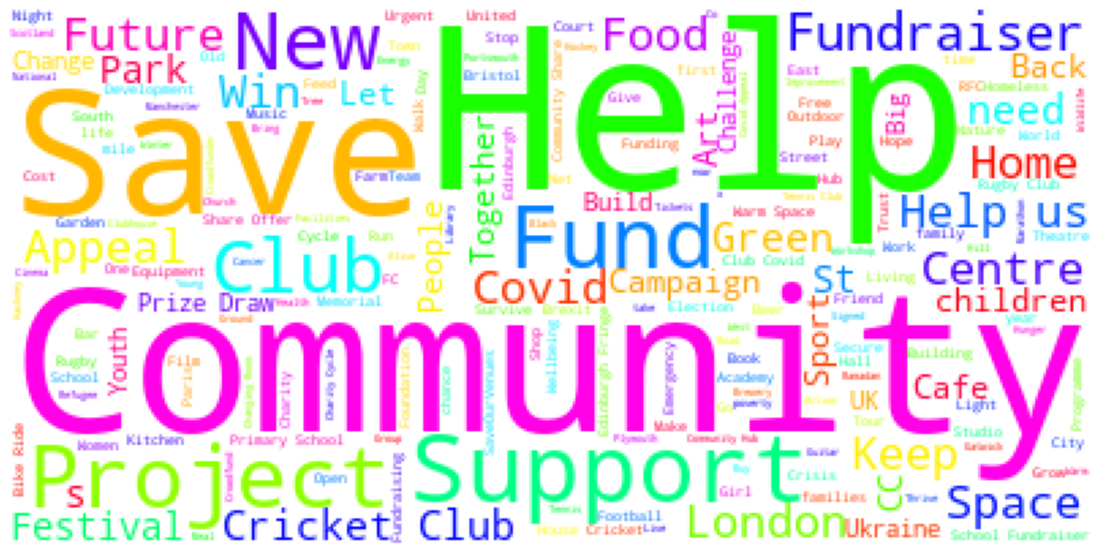

In [286]:
# Облако слов для названий
from wordcloud import WordCloud
text = ' '.join(str(i) for i in df['title'])
wordcloud = WordCloud(background_color="white", colormap="hsv").generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

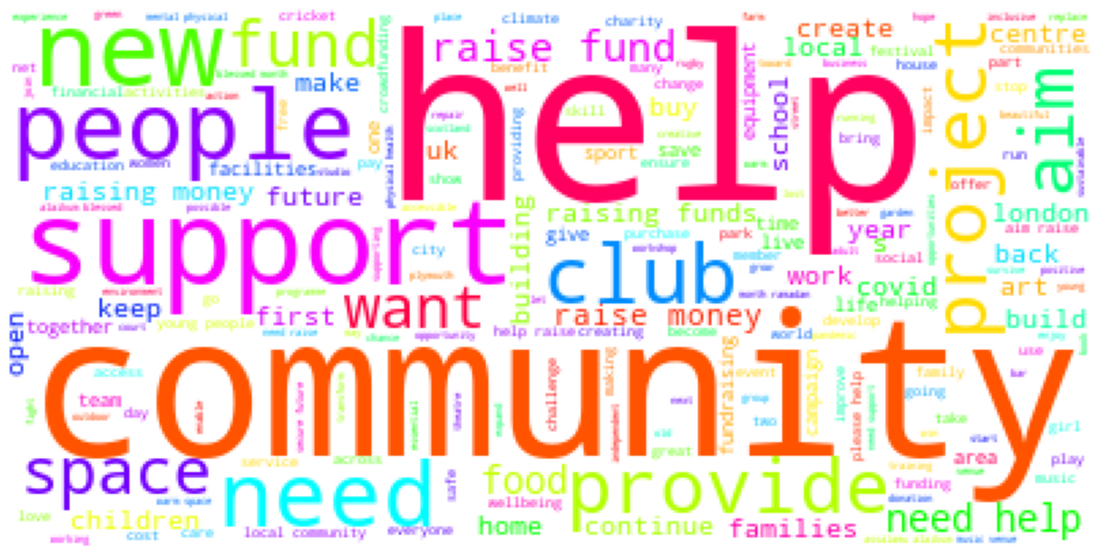

In [279]:
# облако слов для описания
from wordcloud import WordCloud
descr = df['description'].apply(lambda x: ' '.join(x)) # собираем в строку описание для каждого проекта
text = ' '.join(i for i in descr)
wordcloud = WordCloud(background_color="white", colormap="hsv").generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### Столбчатые диаграммы локаций по количеству успешных и текущих проектов  

In [21]:
success_cities = df.groupby('location')['status'].apply(lambda x: (x == 'success').sum())
success_cities = success_cities.sort_values() # все города, сгруппированные по данному признаку
suc_cit = success_cities.loc[lambda x: x > 0] # действительно успешные города
print('Количество городов, в которых нет успешных проектов, равно', success_cities.loc[lambda x: x == 0].shape[0])
print('Количество городов, в которых 1 успешный проект, равно', success_cities.loc[lambda x: x == 1].shape[0])
print('Количество городов, в которых больше одного успешного проекта, равно', success_cities.loc[lambda x: x > 1].shape[0])

Количество городов, в которых нет успешных проектов, равно 229
Количество городов, в которых 1 успешный проект, равно 294
Количество городов, в которых больше одного успешного проекта, равно 115


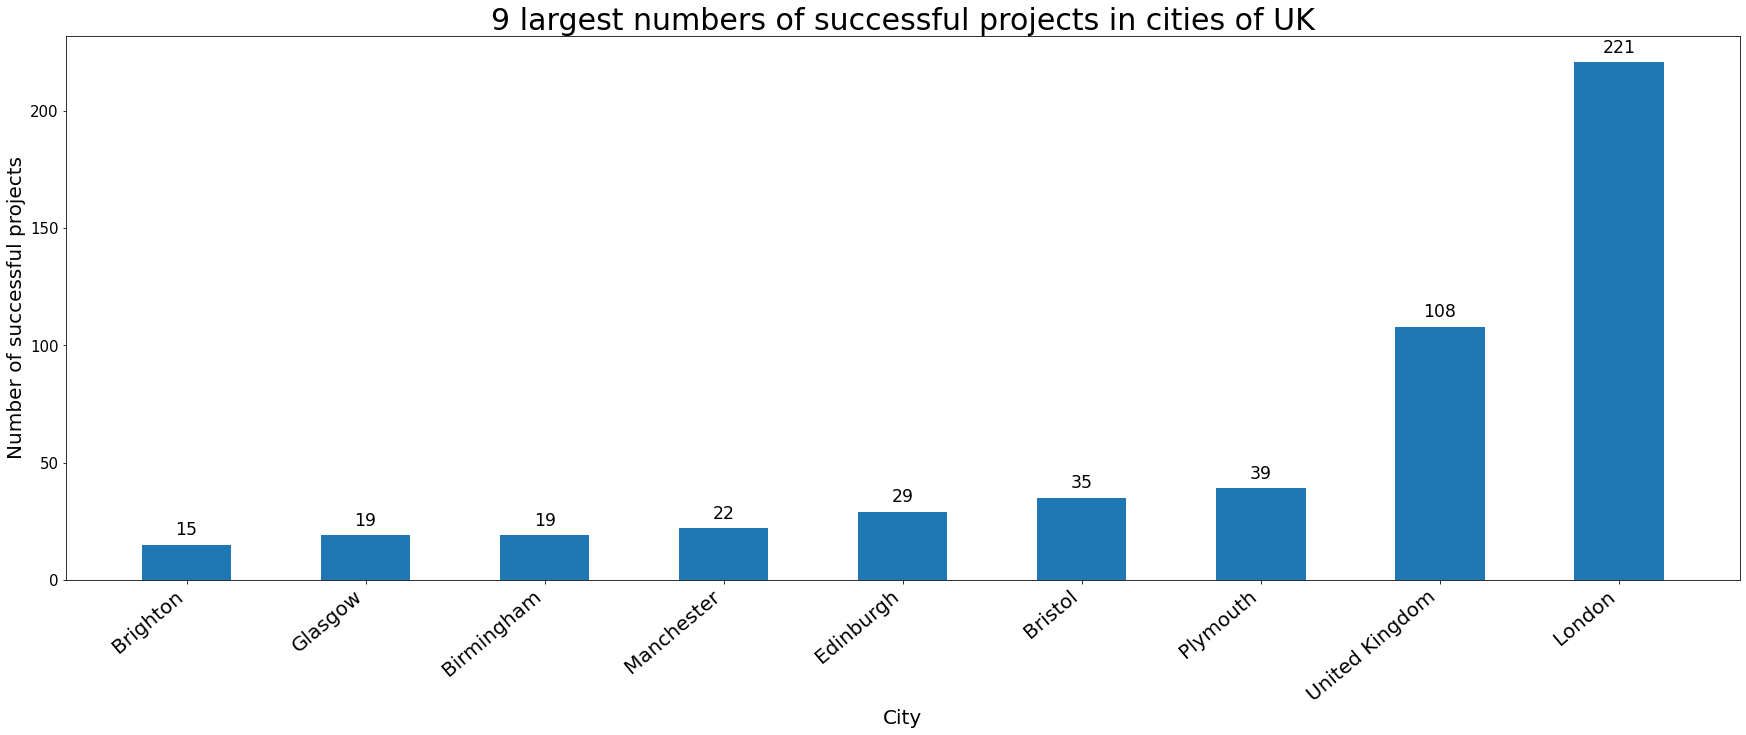

In [22]:
import matplotlib.ticker as mticker
most_suc = success_cities.loc[lambda x: x > 10]
f, ax = plt.subplots(figsize=(30,10))
plt.bar(most_suc.index, most_suc.values, width=0.5)
plt.xlabel('City', fontsize=20)
plt.ylabel('Number of successful projects', fontsize=20);
plt.title('9 largest numbers of successful projects in cities of UK', fontsize=30);
ticks_loc = ax.get_xticks()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_xticklabels(most_suc.index, rotation=40, ha="right", fontsize=20);
plt.yticks(fontsize = 15);
for i in range(len(list(most_suc.index))):
    plt.text(i, int(list(most_suc.values)[i]), int(list(most_suc.values)[i]), ha = 'center', size='xx-large', position=(i, 4 + list(most_suc.values)[i]))

In [23]:
funding_cities = df.groupby('location')['status'].apply(lambda x: (x=='funding').sum()).sort_values()
funding_cities = funding_cities.sort_values()
fun_cit = funding_cities.loc[lambda x: x > 0]
fun_cit.loc[lambda x: x > 1]
print('Количество городов, в которых нет текущих проектов, равно', funding_cities.loc[lambda x: x == 0].shape[0])
print('Количество городов, в которых 1 текущий проект, равно', funding_cities.loc[lambda x: x == 1].shape[0])
print('Количество городов, в которых больше одного текущего проекта, равно', funding_cities.loc[lambda x: x > 1].shape[0])

Количество городов, в которых нет текущих проектов, равно 275
Количество городов, в которых 1 текущий проект, равно 242
Количество городов, в которых больше одного текущего проекта, равно 121


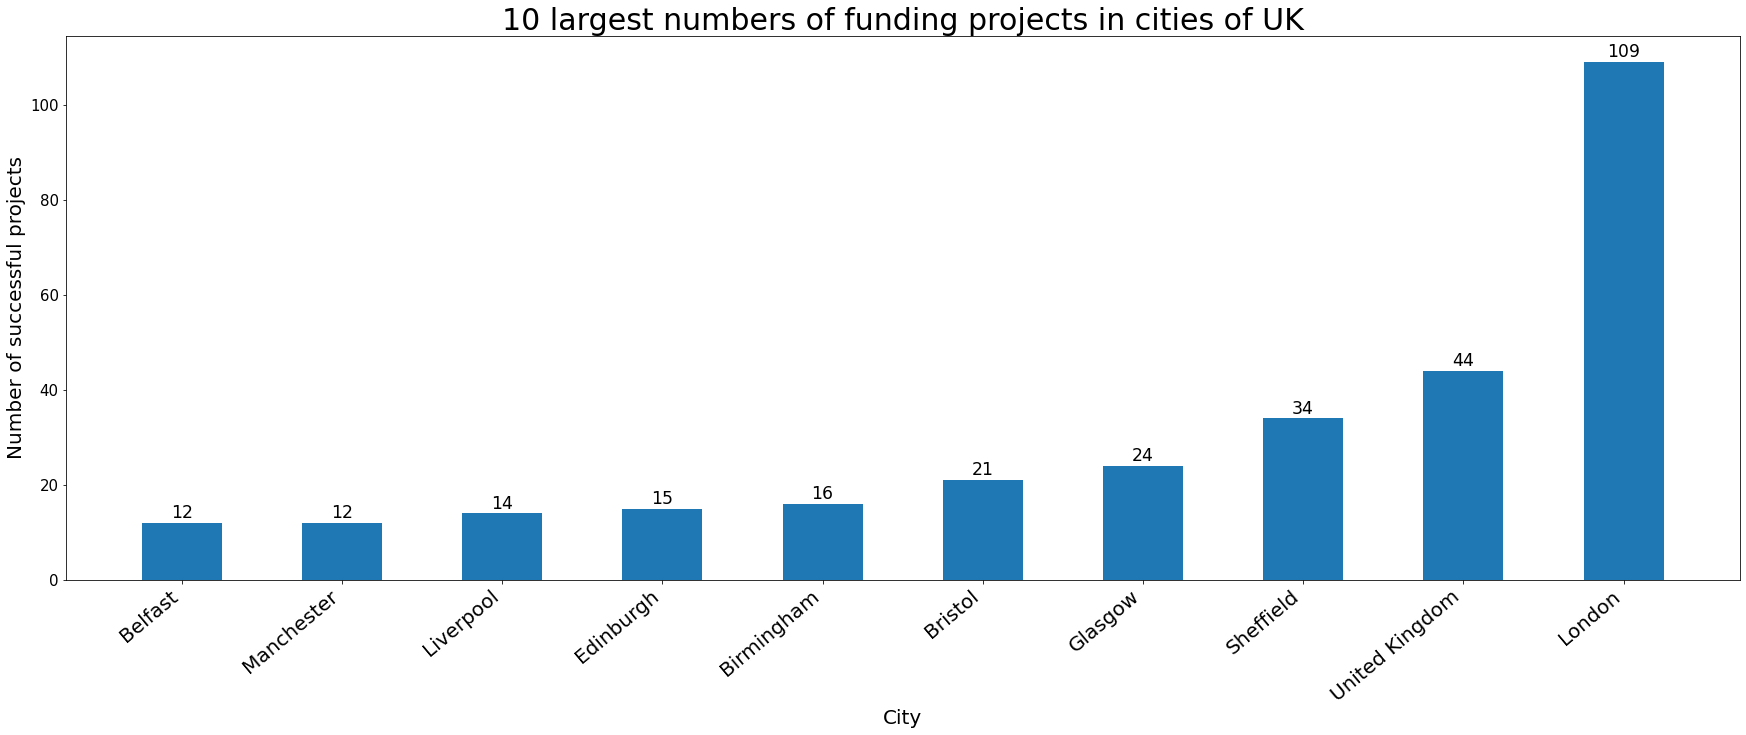

In [24]:
f, ax = plt.subplots(figsize=(30,10))
most_fund = funding_cities.loc[lambda x: x > 10]
plt.bar(most_fund.index, most_fund.values, width=0.5)
plt.xlabel('City', fontsize=20)
plt.ylabel('Number of successful projects', fontsize=20);
plt.title('10 largest numbers of funding projects in cities of UK', fontsize=30);
ticks_loc = ax.get_xticks()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_xticklabels(most_fund.index, rotation=40, ha="right", fontsize=20);
plt.yticks(fontsize = 15);
for i in range(len(list(most_fund.index))):
    plt.text(i, int(list(most_fund.values)[i]), int(list(most_fund.values)[i]), ha = 'center', size='xx-large', position=(i, 1 + list(most_fund.values)[i]))

In [307]:
both = set(most_suc.index) & set(most_fund.index)
print(', '.join(both))

United Kingdom, Manchester, Edinburgh, Glasgow, Birmingham, Bristol, London


По графикам видно, что Лондон является ключевым городом, в нем много как успешных, так и текущих проектов. Также значительную роль играют национальные проекты с локацией United Kingdom.

Кроме того, 7 городов входят в список городов и по наибольшему количеству успешных проектов, и по текущим, поэтому можно предположить, что локация может влиять на успешность проекта.

#### Распределение тэгов по проектам в целом, а также отдельно для текущих и успешных

In [213]:
df_tags = pd.read_pickle('df_tags_nlp.pkl')
df_tags['location'] = df['location']
df_tags.head()

,href,title,description,location,tags,upd,comm,supp,rewards_num,money,...,tags_Tourism,tags_Transport,tags_Travel,tags_University,tags_Venue,tags_null,sentiment_score,ps_capital,inn_score,eco_score
0,https://www.crowdfunder.co.uk/free-assange,Help campaign to Free Julian Assange,"[help, campaign, free, julian, assange, stop, ...",London,"[Community, Personal Causes]",22,1242,3576,0,300000,...,0,0,0,0,0,0,0.7840,0,0,0
1,https://www.crowdfunder.co.uk/blackout2023,Black Out 2023 | Cannes Lions Festival,"[taking, black, talent, connected, creative, i...",London,"[Business, Music]",0,9,24,0,100000,...,0,0,0,0,0,0,0.9217,0,2,0
2,https://www.crowdfunder.co.uk/50-days-to-make-...,50 Days to Make a Difference,"[scientists, curate, portfolio, effective, cli...",London,[Environment],0,11,68,3,150000,...,0,0,0,0,0,0,0.7430,1,0,2
3,https://www.crowdfunder.co.uk/saveside,#SAVESIDE,"[april, side, gallery, close, public, due, cri...",Newcastle upon Tyne,[Creative & Arts],5,694,1806,0,75000,...,0,0,0,0,0,0,-0.7096,0,0,0
4,https://www.crowdfunder.co.uk/lets-smash-the-p...,Let's smash the political silence on Brexit,"[everyone, knows, brexit, working, politicians...",London,[Politics],1,407,2391,6,100000,...,0,0,0,0,0,0,0.0000,0,0,0


Для наглядности мы построили столбчатые диаграммы количества тегов в целом, а также отдельно для успешных и текущих проектов.

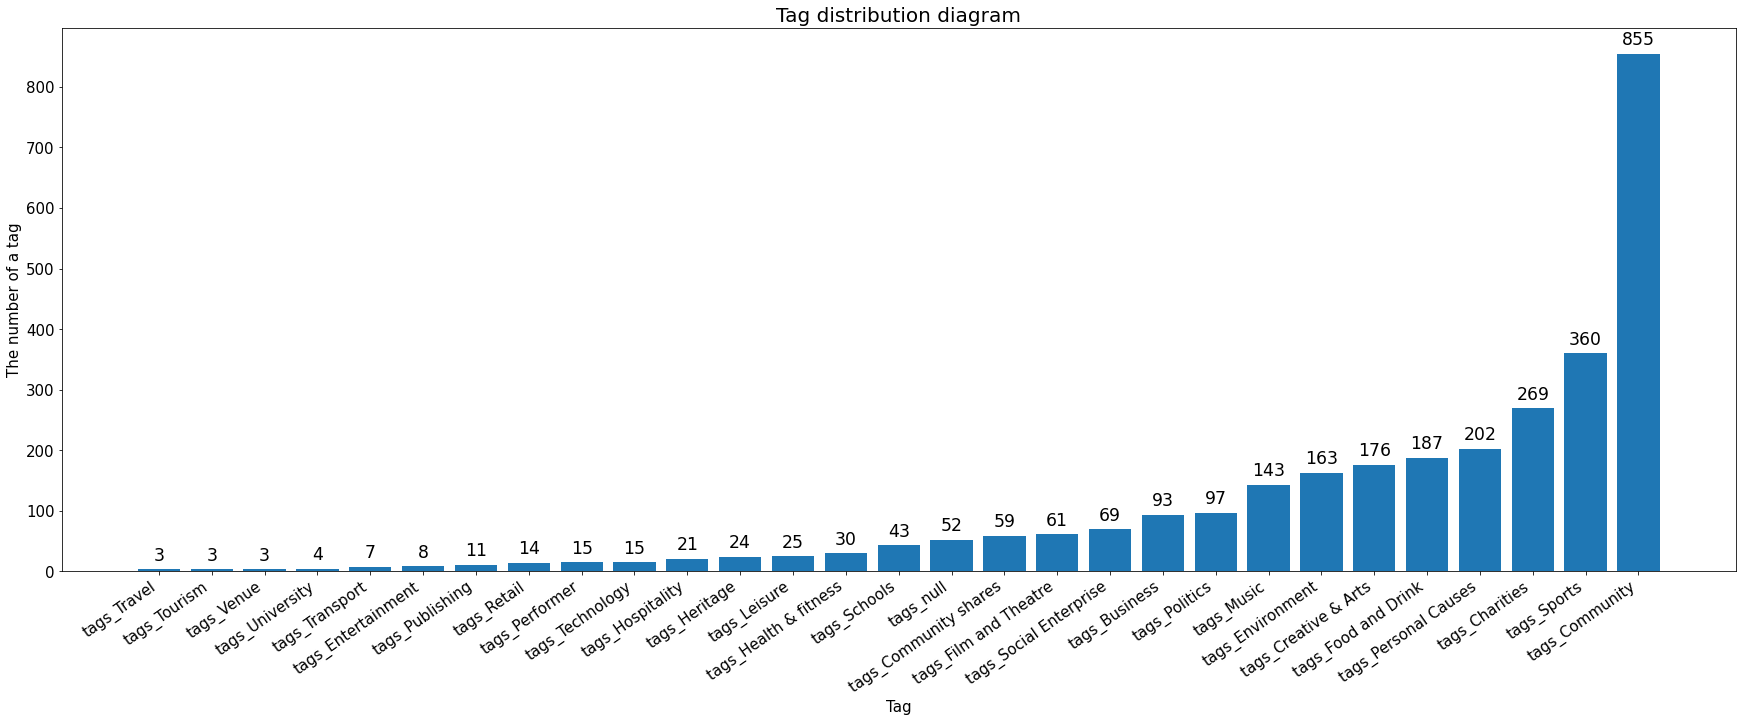

In [19]:
df_tags = df.iloc[:, 13:42]
df_tags_sum = df_tags.sum().sort_values()
f, ax = plt.subplots(figsize=(30,10))
plt.bar(df_tags_sum.index, df_tags_sum.values)
ticks_loc = ax.get_xticks()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_xticklabels(df_tags_sum.index, rotation=35, ha="right", fontsize=15)
plt.title('Tag distribution diagram', fontsize=20)
plt.xlabel('Tag', fontsize = 15)
plt.ylabel('The number of a tag', fontsize = 15)
plt.yticks(fontsize = 15);
for i in range(len(list(df_tags_sum.index))):
    plt.text(i, int(list(df_tags_sum.values)[i]), int(list(df_tags_sum.values)[i]), ha = 'center', size='xx-large', position=(i, 15 + list(df_tags_sum.values)[i]))

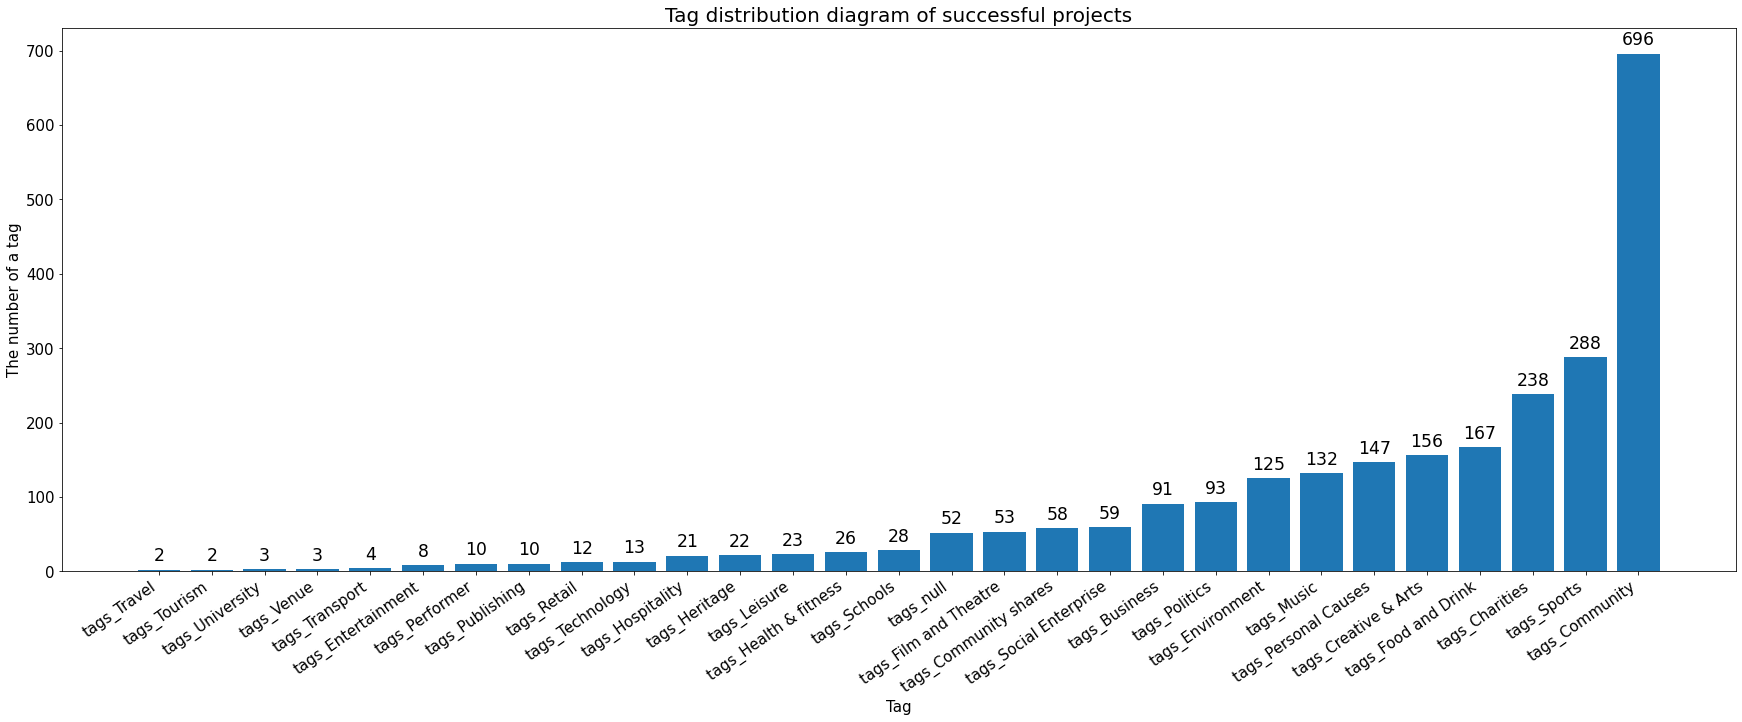

In [26]:
success = df[df.location.isin(suc_cit.index)]
df_tags_suc = success.iloc[:, 13:42]
df_tags_sum_suc = df_tags_suc.sum().sort_values()
f, ax = plt.subplots(figsize=(30,10))
plt.bar(df_tags_sum_suc.index, df_tags_sum_suc.values)
ticks_loc = ax.get_xticks()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_xticklabels(df_tags_sum_suc.index, rotation=35, ha="right", fontsize=15)
plt.title('Tag distribution diagram of successful projects', fontsize=20)
plt.xlabel('Tag', fontsize = 15)
plt.ylabel('The number of a tag', fontsize = 15)
plt.yticks(fontsize = 15);
for i in range(len(list(df_tags_sum_suc.index))):
    plt.text(i, int(list(df_tags_sum_suc.values)[i]), int(list(df_tags_sum_suc.values)[i]), ha = 'center', size='xx-large', position=(i, 12 + list(df_tags_sum_suc.values)[i]))

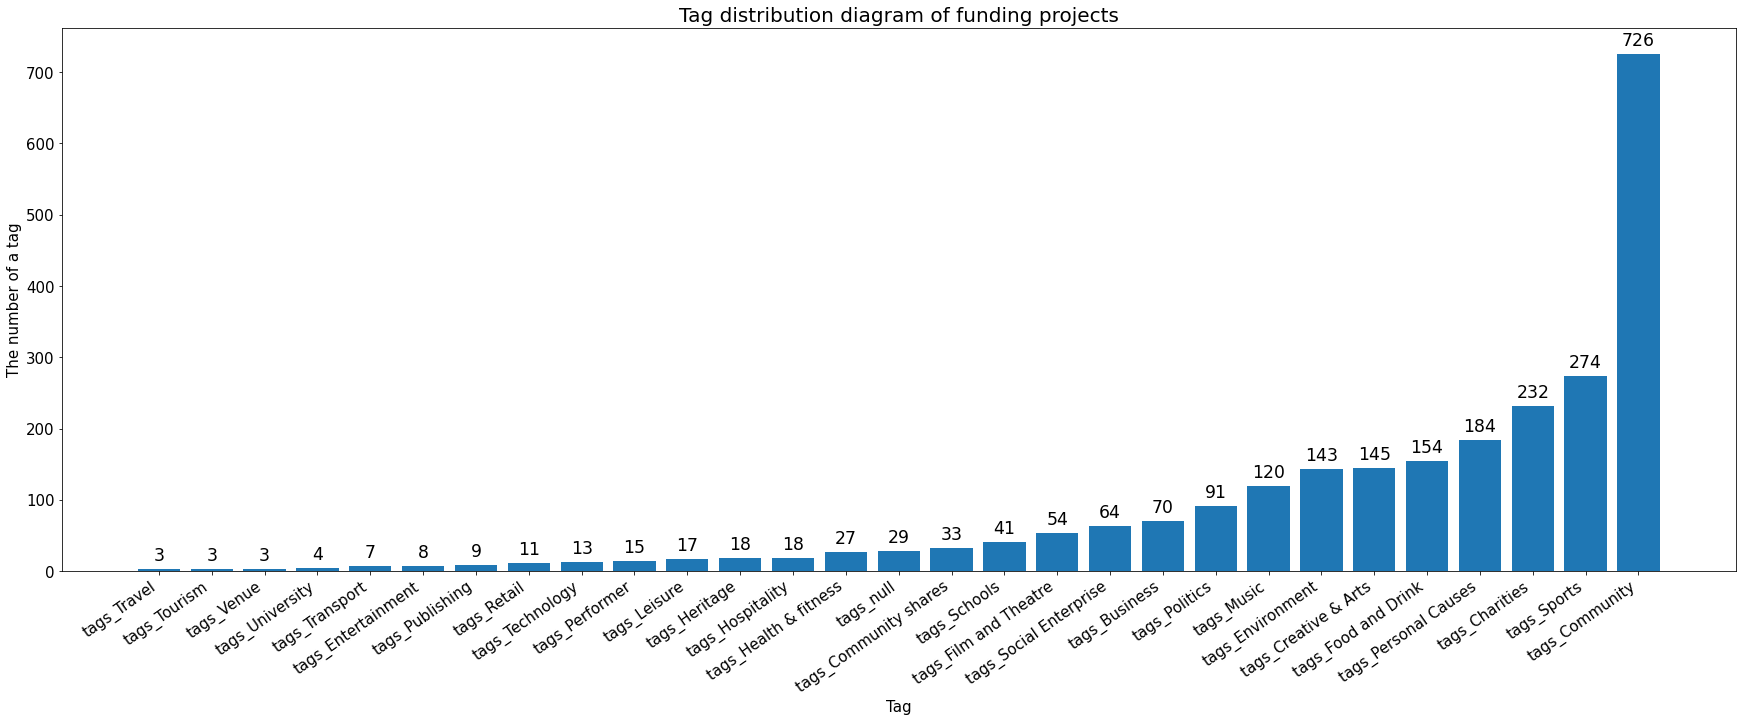

In [28]:
funding = df[df.location.isin(fun_cit.index)]
df_tags_fun = funding.iloc[:, 13:42]
df_tags_sum_fun = df_tags_fun.sum().sort_values()
f, ax = plt.subplots(figsize=(30,10))
plt.bar(df_tags_sum_fun.index, df_tags_sum_fun.values)
ticks_loc = ax.get_xticks()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_xticklabels(df_tags_sum_fun.index, rotation=35, ha="right", fontsize=15)
plt.title('Tag distribution diagram of funding projects', fontsize=20)
plt.xlabel('Tag', fontsize = 15)
plt.ylabel('The number of a tag', fontsize = 15)
plt.yticks(fontsize = 15);
for i in range(len(list(df_tags_sum_fun.index))):
    plt.text(i, int(list(df_tags_sum_fun.values)[i]), int(list(df_tags_sum_fun.values)[i]), ha = 'center', size='xx-large', position=(i, 12 + list(df_tags_sum_fun.values)[i]))

In [308]:
df_tags_sum_suc.index == df_tags_sum_fun.index

array([ True,  True, False, False,  True,  True, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
        True,  True,  True, False, False, False, False, False,  True,
        True,  True])

Отметим, что распределение тэгов является практически одинаковым для успешных и текущих проектов, наиболее популярными являются тэги благотворительность, спорт и сообщество

### Гистограммы распределения количества апдейтов, комментариев, сторонников и количества наград

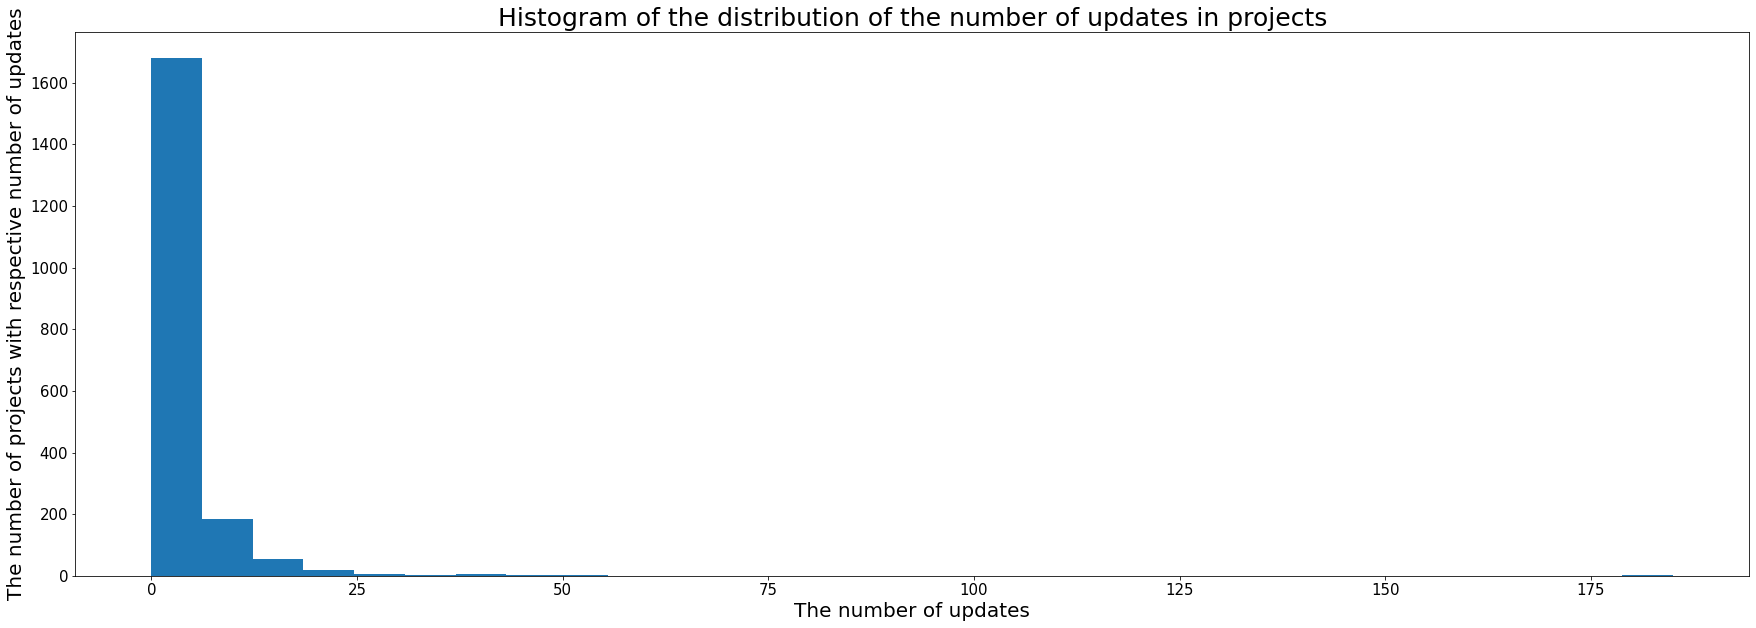

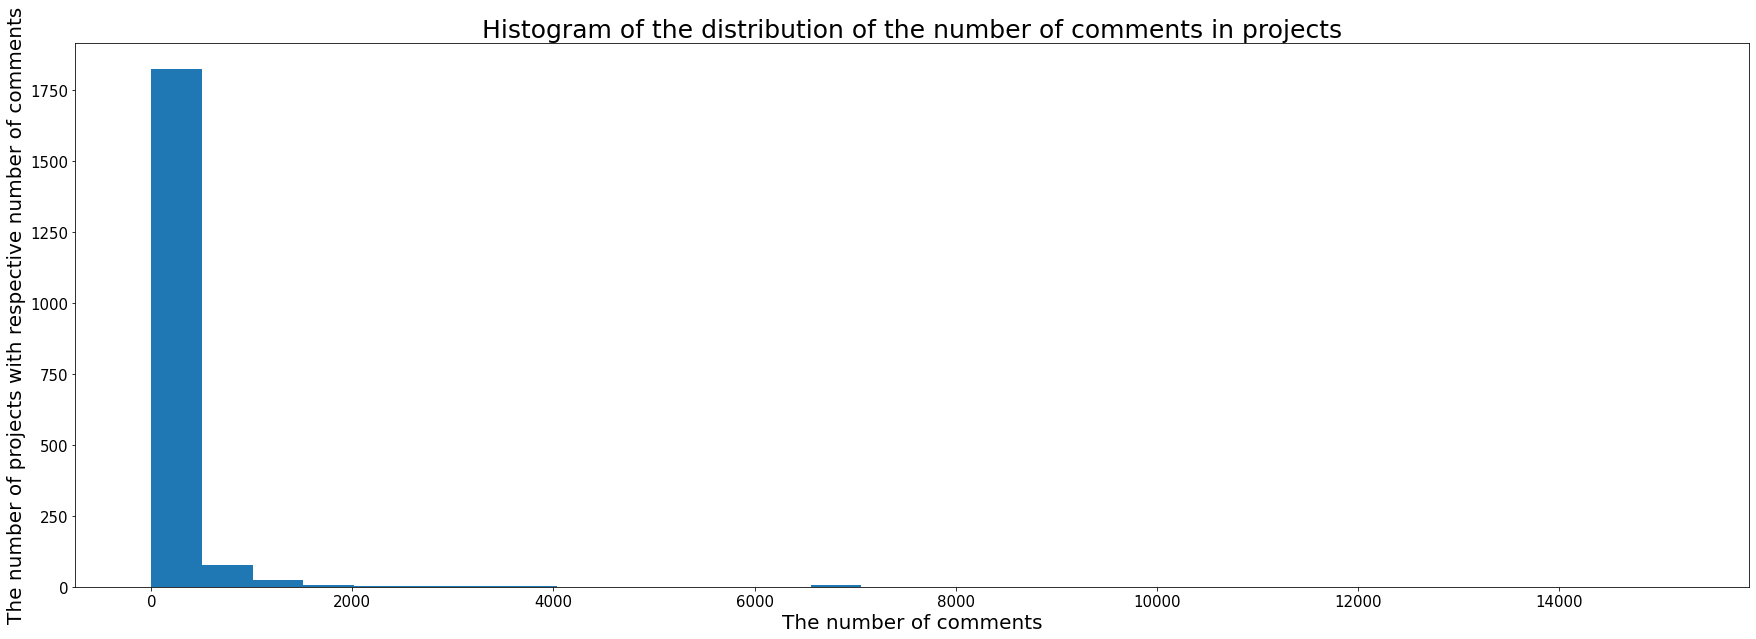

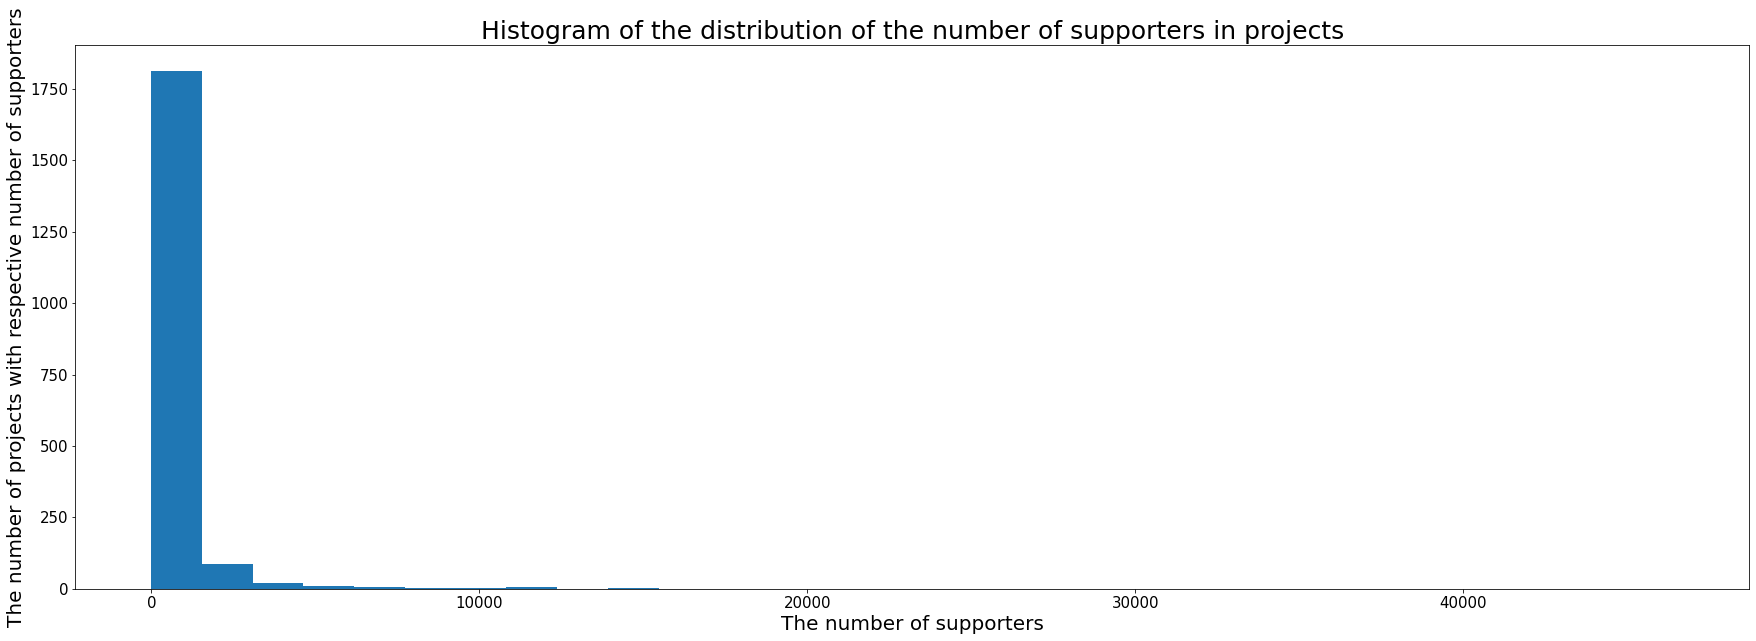

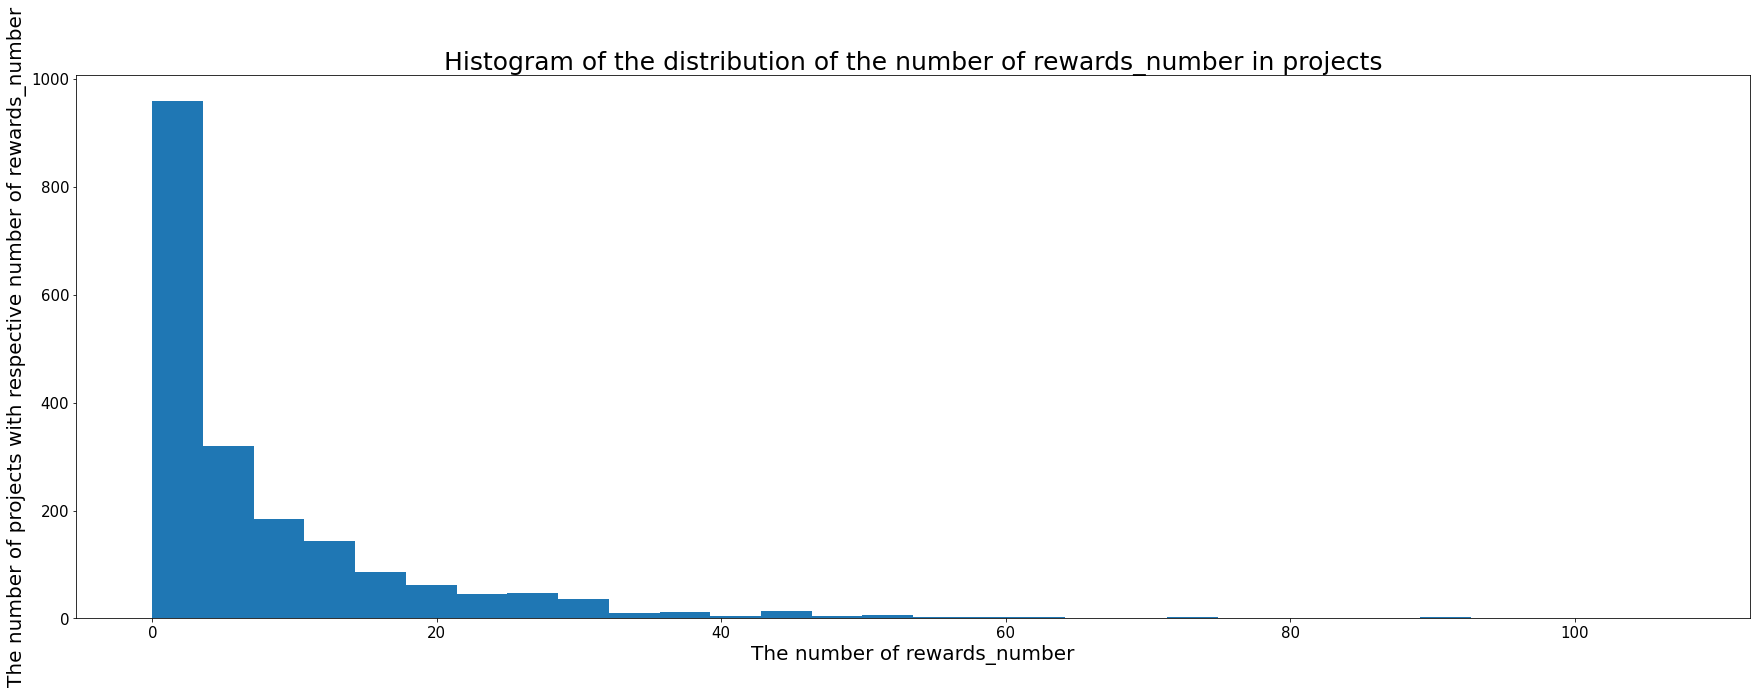

In [90]:
hist_col = ['upd', 'comm', 'supp', 'rewards_num']
names = ['updates', 'comments', 'supporters', 'rewards_number']
for i in range(len(hist_col)):
    f, ax = plt.subplots(figsize=(30,10))
    plt.hist(df[hist_col[i]], bins=30)
    plt.title('Histogram of the distribution of the number of {} in projects'.format(names[i]), fontsize=25)
    plt.xlabel('The number of {}'.format(names[i]), fontsize = 20)
    plt.yticks(fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.ylabel('The number of projects with respective number of {}'.format(names[i]), fontsize = 20);

Как видно по гистограммам, в данных есть выбросы - в каждом столбце, тогда как в основном количество тэгов составляет от 0 до 5, комментариев - от 0 до 100, сторонников - от 0 до 150, количества наград - от 0 до 20

Также первые графики не дают достаточного представления о распределении данных, поэтому стоит применить к данным какое-либо монотонное преобразование

Чтобы получше понять распределение данных по этим переменным, мы взяли данные без выбросов и построили гистограммы по ним:

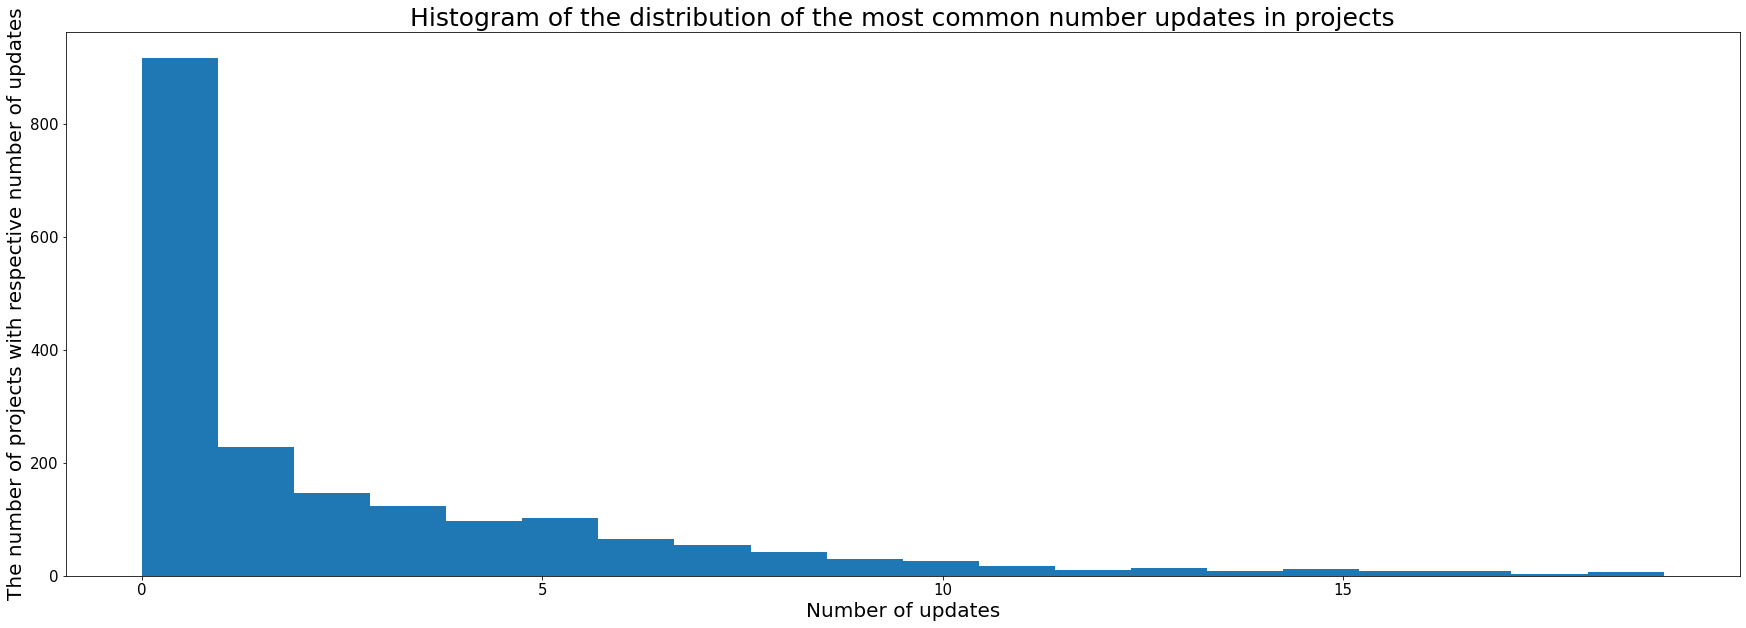

In [105]:
f, ax = plt.subplots(figsize=(30,10))
plt.hist(df[df['upd'] < 20]['upd'], bins=20)
plt.title('Histogram of the distribution of the most common number updates in projects', fontsize=25)
plt.locator_params(axis="x", integer=True, tight=True)
plt.xlabel('Number of updates', fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('The number of projects with respective number of updates', fontsize = 20);

In [160]:
# количество проектов, в которых меньше 20 комментариев
# напомним, что всего в выборке 1952 наблюдения
df[df['upd'] < 20].shape

(1922, 46)

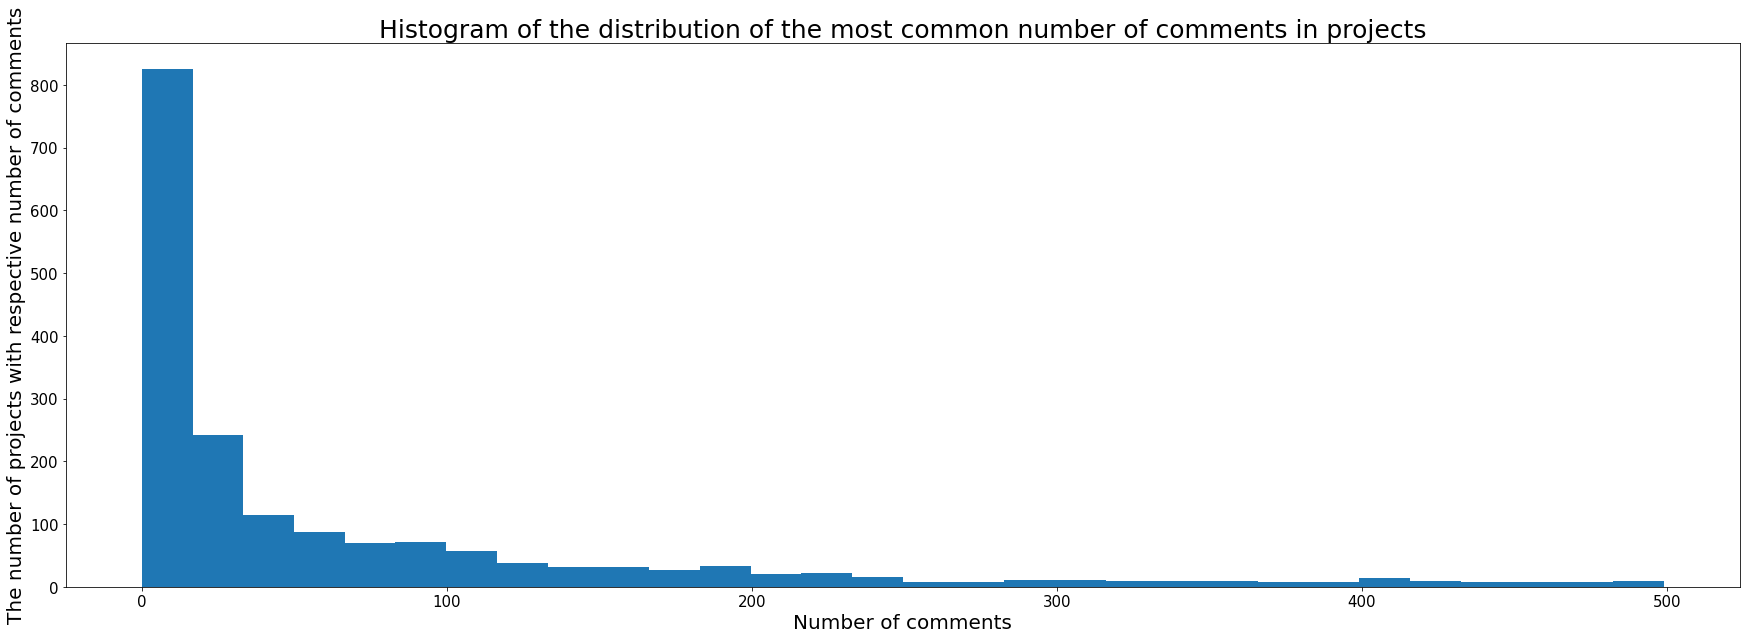

In [114]:
f, ax = plt.subplots(figsize=(30,10))
plt.hist(df[df['comm'] < 500]['comm'], bins=30)
plt.title('Histogram of the distribution of the most common number of comments in projects', fontsize=25)
plt.xlabel('Number of comments', fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('The number of projects with respective number of comments', fontsize = 20);

In [156]:
# количество проектов, в которых меньше 500 комментариев
df[df['comm'] < 500]['comm'].shape

(1822,)

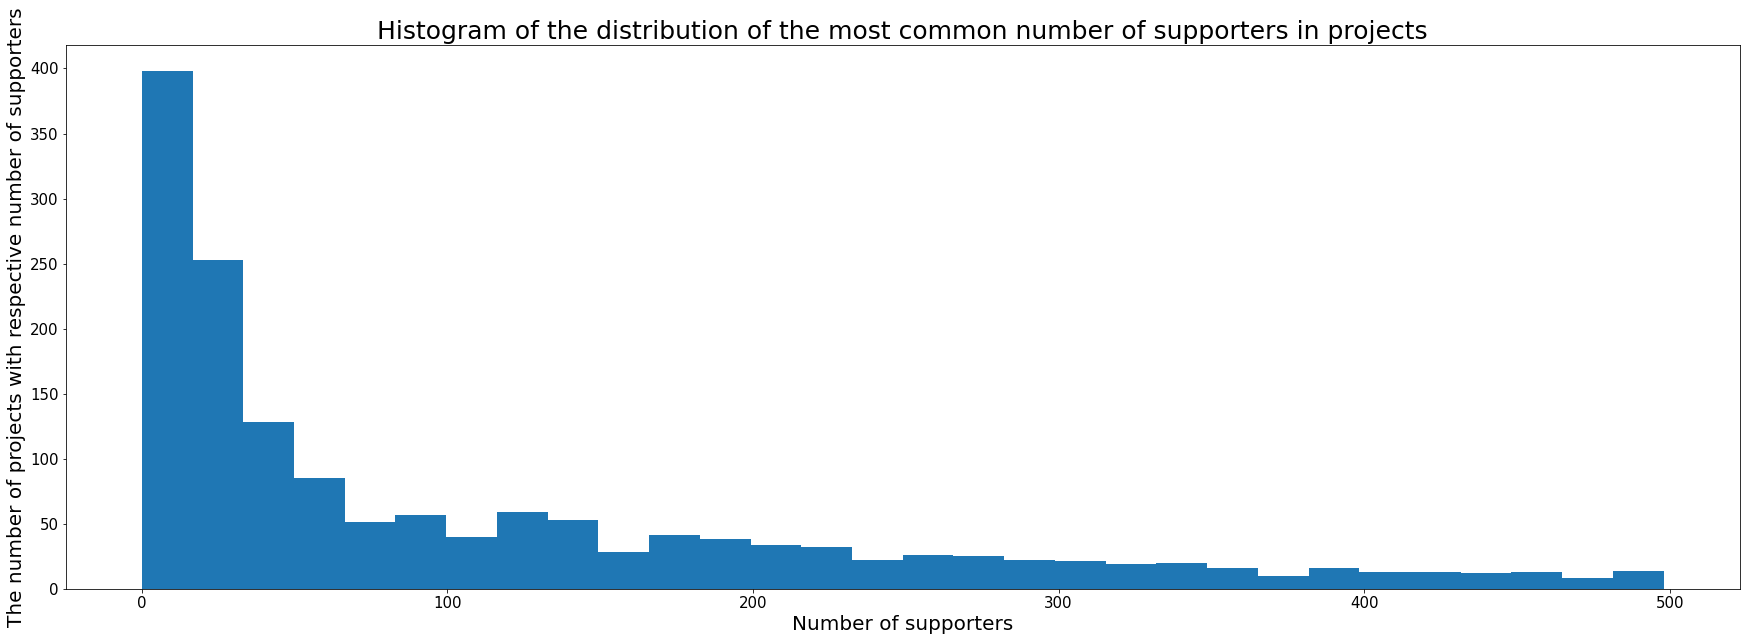

In [147]:
f, ax = plt.subplots(figsize=(30,10))
plt.hist(df[df['supp'] < 500]['supp'], bins=30)
plt.title('Histogram of the distribution of the most common number of supporters in projects', fontsize=25)
plt.xlabel('Number of supporters', fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('The number of projects with respective number of supporters', fontsize = 20);

In [148]:
# количество проектов, в которых меньше 500 сторонников 
df[df['supp'] < 500]['supp'].shape

(1567,)

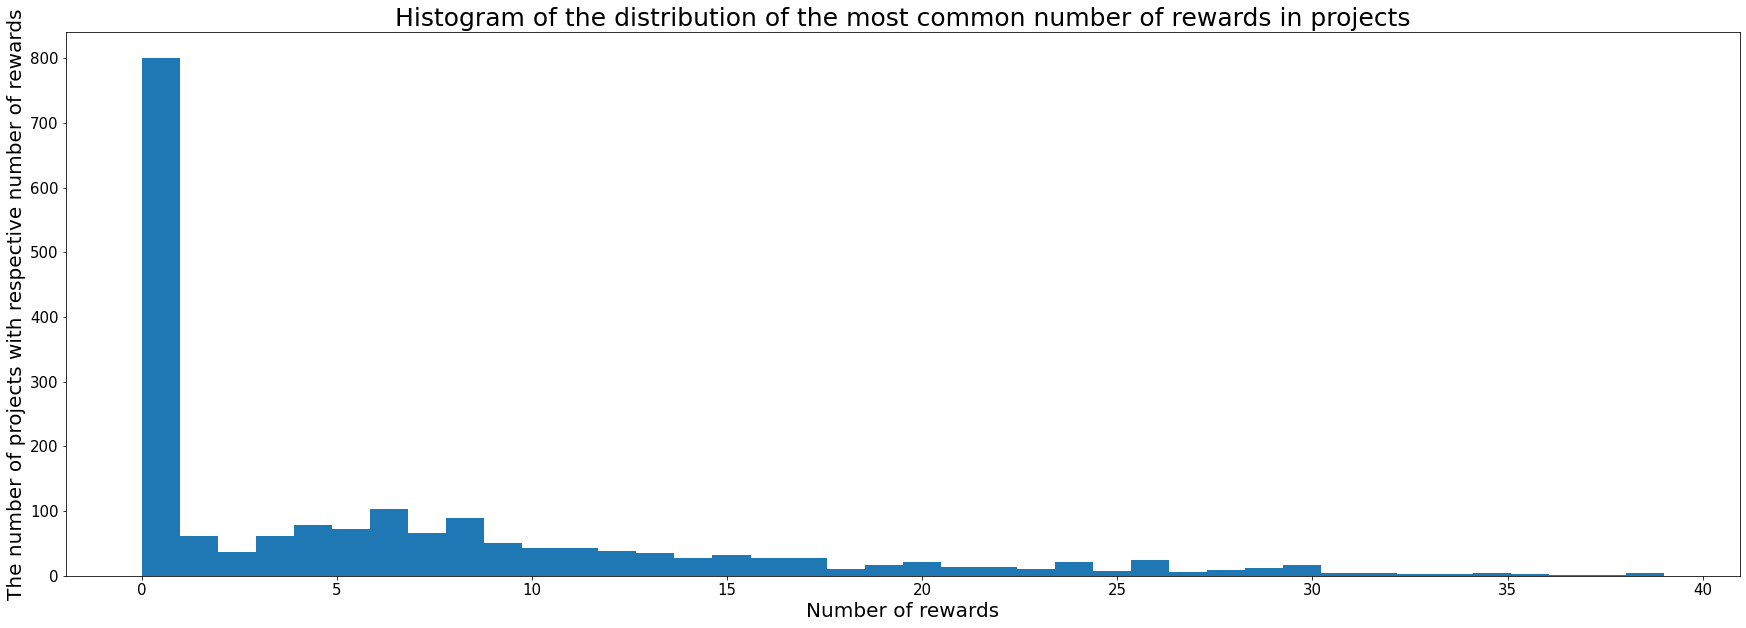

In [136]:
f, ax = plt.subplots(figsize=(30,10))
plt.hist(df[df['rewards_num'] < 40]['rewards_num'], bins=40)
plt.title('Histogram of the distribution of the most common number of rewards in projects', fontsize=25)
plt.xlabel('Number of rewards', fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('The number of projects with respective number of rewards', fontsize = 20);

In [133]:
# количество проектов, в которых меньше 40 наград
df[df['rewards_num'] < 40]['rewards_num'].shape

(1907,)

Можно заметить, что даже после отсечения выбросов, каждый график значительно смещен к нулю, из чего можно сделать вывод, что в бОльшей части выборки значения данных переменных являются небольшими. Так, примерно, у 800 проектов отсутствуют награды вообще (а это почти 40%!), у 900 - апдейты и у 800 количество комментариев меньше 20.

### Гистограммы распределения sentiment_score, ps_capital, inn_score, eco_score

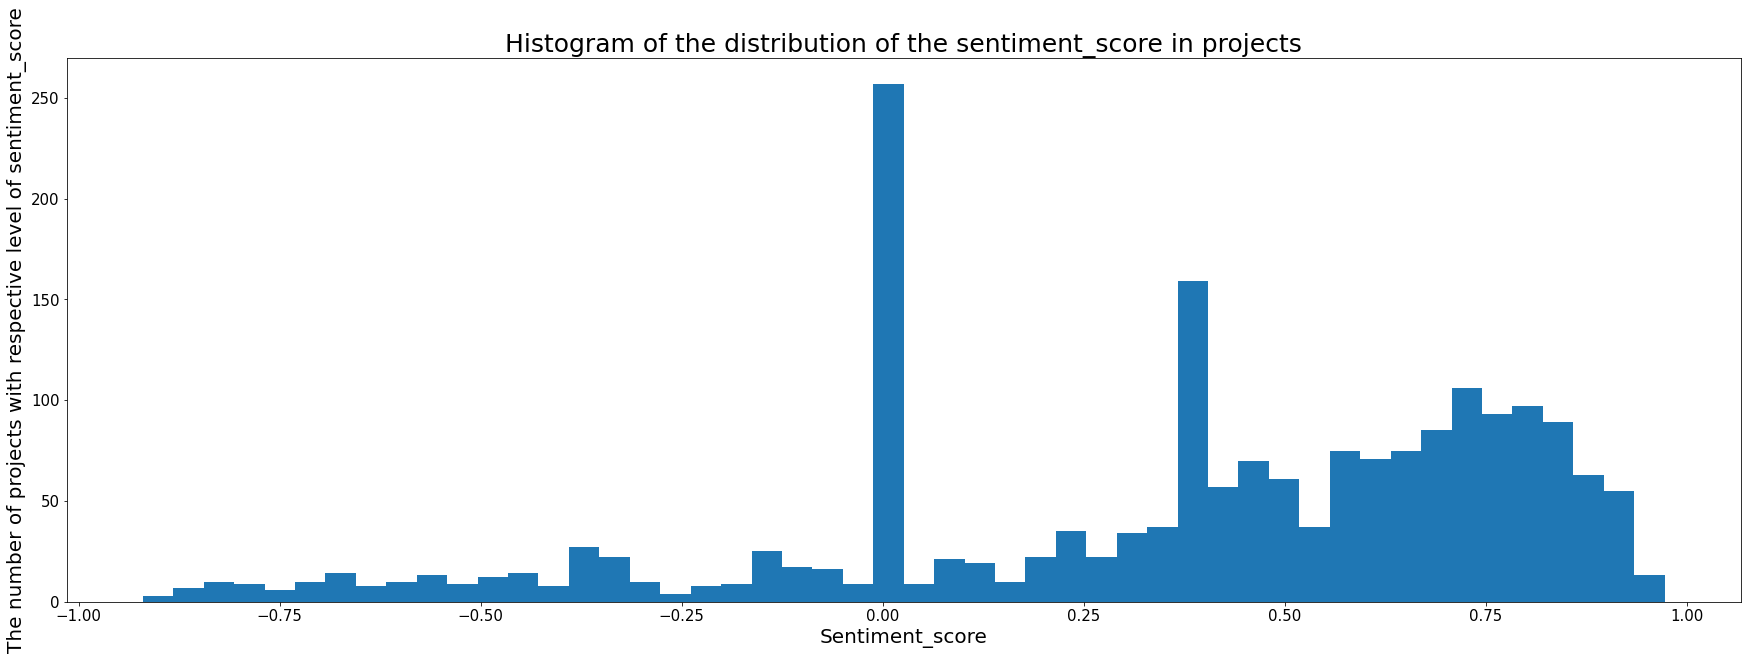

In [79]:
f, ax = plt.subplots(figsize=(30,10))
plt.hist(df['sentiment_score'], bins=50)
plt.title('Histogram of the distribution of the {} in projects'.format('sentiment_score'), fontsize=25)
plt.xlabel('Sentiment_score', fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('The number of projects with respective level of sentiment_score', fontsize = 20);

Можно заметить, что в большинстве проектов метрика больше 0.25, однако мода распределения равна 0

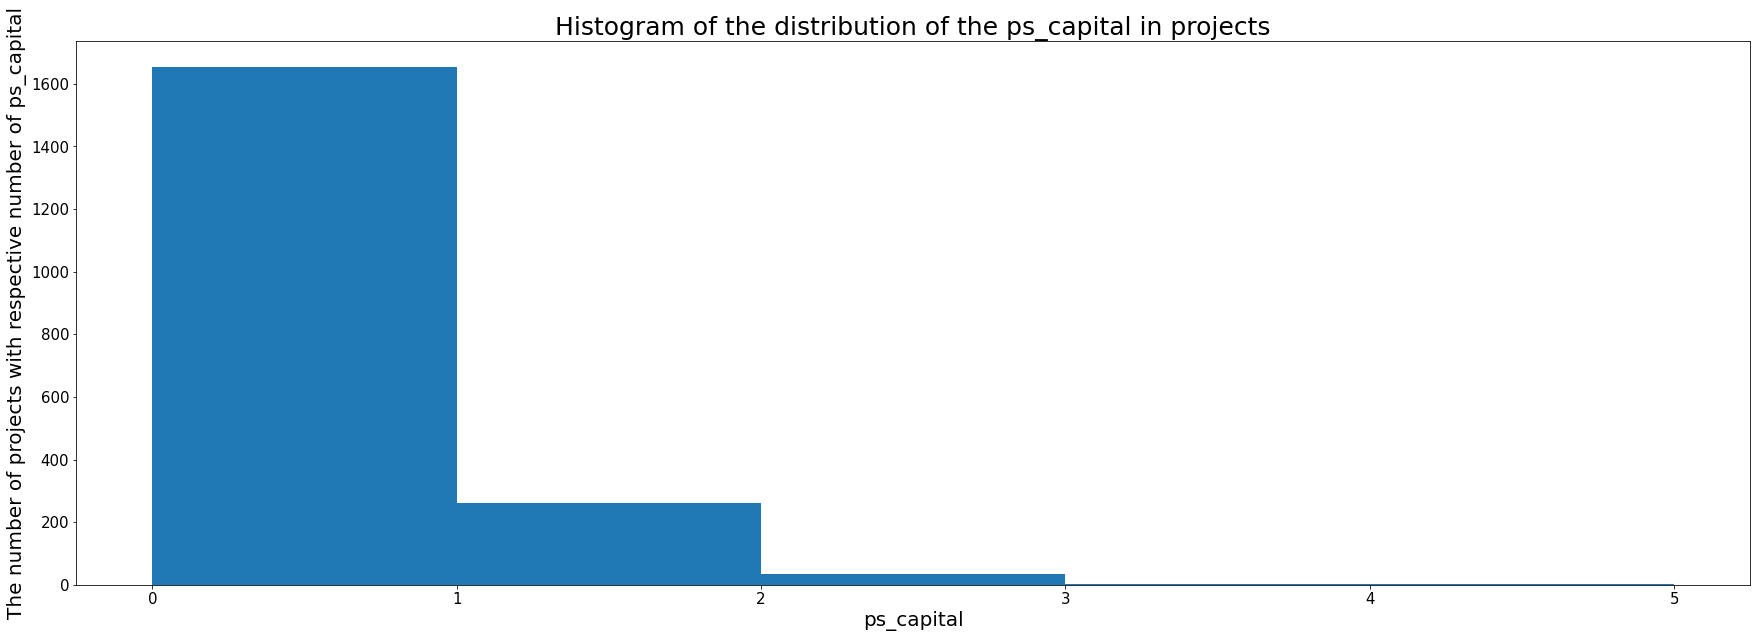

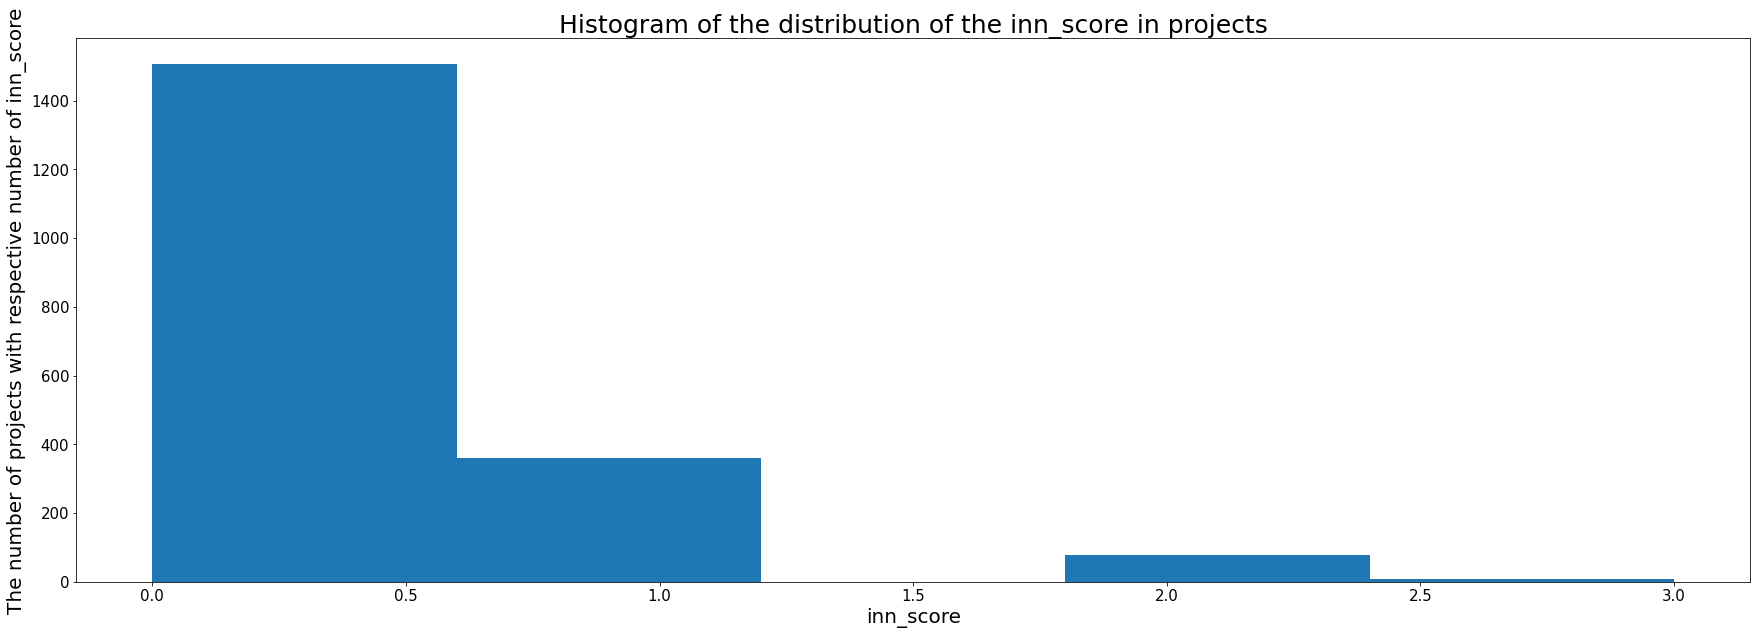

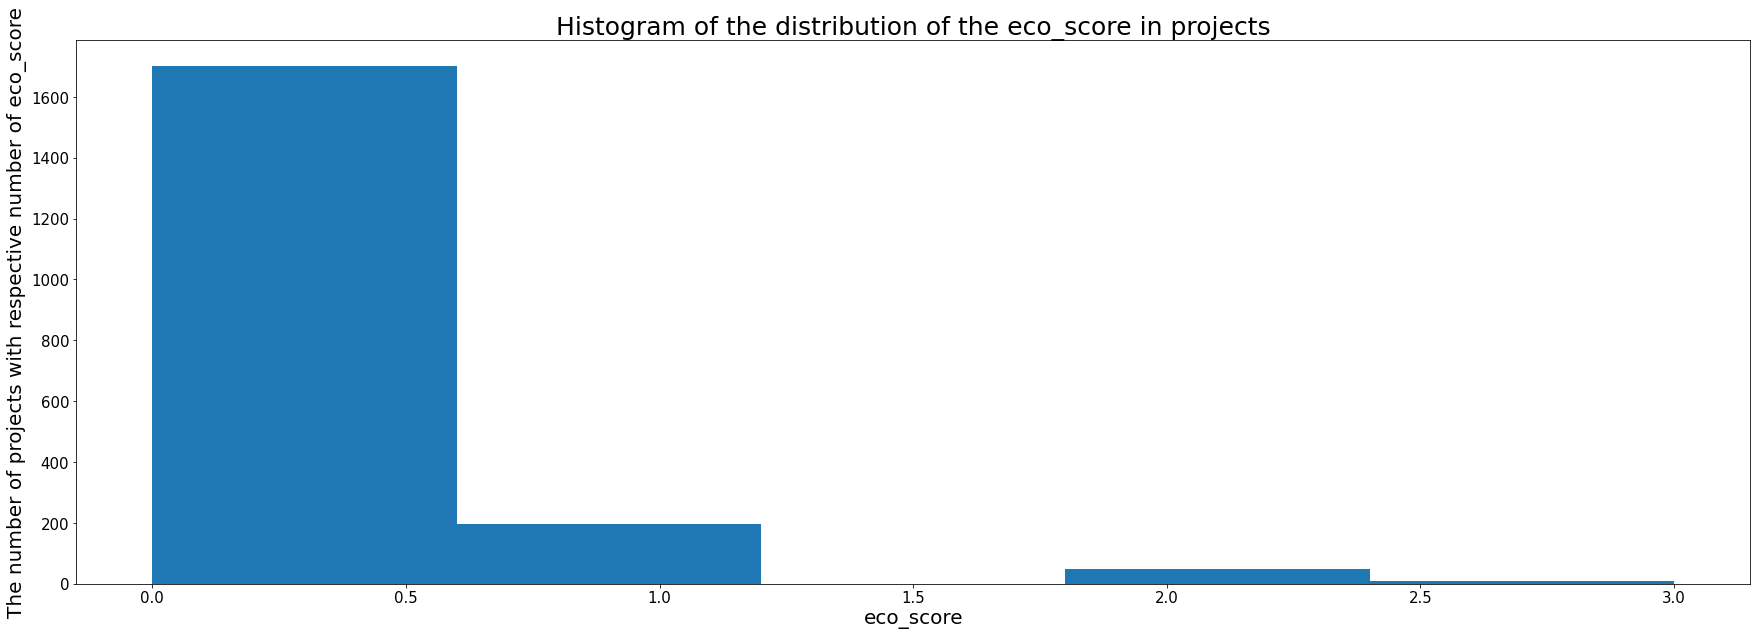

In [83]:
hist_col2 = ['ps_capital', 'inn_score', 'eco_score']
for i in hist_col2:
    f, ax = plt.subplots(figsize=(30,10))
    plt.hist(df[i], bins=5)
    plt.title('Histogram of the distribution of the {} in projects'.format(i), fontsize=25)
    plt.xlabel(i, fontsize = 20)
    plt.yticks(fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.ylabel('The number of projects with respective number of {}'.format(i), fontsize = 20);

В этих данных также есть незначительное количество выбросов, ps_capital имеет максимальное значение 5, остальные метрики не превышают значение 3. Для первой метрики большинство данных сосредоточено в интервале от 0 до 1, для двух оставшихся - от 0 до 0.5

## Диаграммы рассеяния для переменной money и upd, comm, rewards_num

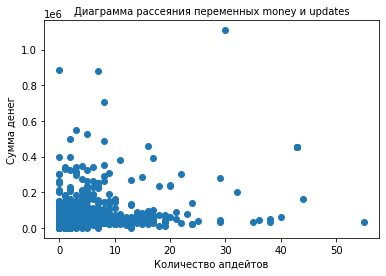

In [111]:
plt.scatter(df['upd'], df['money'])
plt.title('Диаграмма рассеяния переменных money и updates', fontsize=10)
plt.xlabel('Количество апдейтов', fontsize = 10)
plt.ylabel('Сумма денег', fontsize = 10);

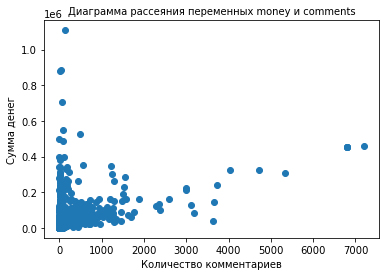

In [116]:
plt.scatter(df['comm'], df['money'])
plt.title('Диаграмма рассеяния переменных money и comments', fontsize=10)
plt.xlabel('Количество комментариев', fontsize = 10)
plt.ylabel('Сумма денег', fontsize = 10);

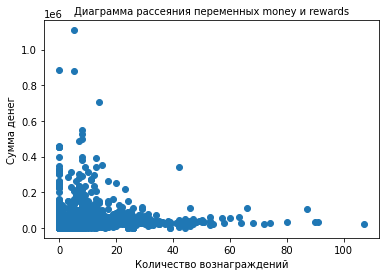

In [117]:
plt.scatter(df['rewards_num'], df['money'])
plt.title('Диаграмма рассеяния переменных money и rewards', fontsize=10)
plt.xlabel('Количество вознаграждений', fontsize = 10)
plt.ylabel('Сумма денег', fontsize = 10);

In [120]:
# Создадим переменную pledge, отражающую средний взнос участника
df['pledge'] = df['money'] / df['supp']
df.head()

,href,title,description,location,tags,upd,comm,supp,rewards_num,money,...,tags_Transport,tags_Travel,tags_University,tags_Venue,tags_null,sentiment_score,ps_capital,inn_score,eco_score,pledge
0,https://www.crowdfunder.co.uk/free-assange,Help campaign to Free Julian Assange,"[help, campaign, free, julian, assange, stop, ...","London, Greater London, United Kingdom","[Community, Personal Causes]",22,1242,3576,0,300000.0,...,0,0,0,0,0,0.7840,0,0,0,83.892617
1,https://www.crowdfunder.co.uk/blackout2023,Black Out 2023 | Cannes Lions Festival,"[taking, black, talent, connected, creative, i...","London, Greater London, United Kingdom","[Business, Music]",0,9,24,0,100000.0,...,0,0,0,0,0,0.9217,0,2,0,4166.666667
2,https://www.crowdfunder.co.uk/50-days-to-make-...,50 Days to Make a Difference,"[scientists, curate, portfolio, effective, cli...","London, Greater London, United Kingdom",[Environment],0,11,68,3,150000.0,...,0,0,0,0,0,0.7430,1,0,2,2205.882353
3,https://www.crowdfunder.co.uk/saveside,#SAVESIDE,"[april, side, gallery, close, public, due, cri...","Newcastle upon Tyne, Tyne and Wear, United Kin...",[Creative & Arts],5,694,1806,0,75000.0,...,0,0,0,0,0,-0.7096,0,0,0,41.528239
4,https://www.crowdfunder.co.uk/lets-smash-the-p...,Let's smash the political silence on Brexit,"[everyone, knows, brexit, working, politicians...","London, Greater London, United Kingdom",[Politics],1,407,2391,6,100000.0,...,0,0,0,0,0,0.0000,0,0,0,41.823505


In [122]:
# Запишем итоговую таблицу в отдельный файл
df.to_pickle('df_hyp.pkl')

### Цели на машинное обучение
В последующей работе мы сфокусируемся на анализе средних вложений для каждого проекта, а также успешности текущих проектов. В связи с этим у нас есть две задачи машинного обучения:

1. Предсказать среднее вложение в каждый проект. Это задача будет выполняться для всех собранных данных без учета колонок days, rate и money. Колонка money будет использована для вычисления новых средних вложений в проект (переменная money/supp). По оставшимся данным мы будем предсказывать средние вложения для проектов.

2. На основе только успешных проектов мы создадим модель, предсказывающую сколько денег собирает тот или иной проект в зависимости от признаков. Далее с использованием обученной модели мы найдем максимальное количество денег, которое могут собрать текущие проекты и сравним с их целью. Таким образом, можно будет предсказать успешность текущих проектов по анализу нашей модели. 

### Гипотезы

1. Проекты, отмеченные определенными тегами, собирают больше денег чем проекты без этих тэгов
2. Для успешных проектов
- больше апдейтов => больше денег
- больше комментов => больше денег
- больше ревардов  => больше денег

3. 
- психологический капитал положительно связан с average pledge
- инновационность и экологичность положительно связаны с average pledge
- слова, связанные с сообществом, повышают average pledge (например, community, support)
- чем выше sentiment_score, тем выше average pledge
- если вы в лондоне, то average pledge больше